# Jean-Eudes ROUFFIAC

# Compte rendu du TP1 : optimisation sans contraintes


L'objectif de ce premier TP est de programmer des algorithmes d'optimisation afin de trouver le minimum de la fonction de Rosenbrok définie par : 

$$ f(x_1, x_2) = (1-x_1)^2+100(x_2-x_1^2)^2 $$ 


Nous allons utiliser 3 algorithmes que nous comparerons. Dans un premier temps, nous nous intéressons à l'algorithme de plus forte pente à pas fixe, puis nous verrons des méthodes de minimisation unidirectionnelle, à savoir la méthode de Newton et une méthode semblable à la méthode de dichotomie qui est la méthode la section dorée.

Import des libraires qui vont être utiles

In [54]:
import numpy as np
import time
import pandas as pd
from scipy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt 

On définie la fonction de Rosenbrok :

In [15]:
def f(x1, x2):
    return (1-x1)*(1-x1) + 100*(x2 - x1*x1)*(x2 - x1*x1)

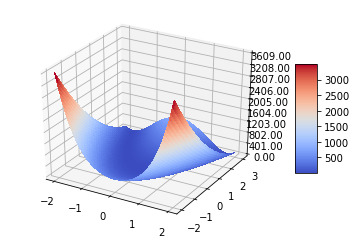

In [21]:
fig = plot.figure()
ax = fig.gca(projection='3d')

s = 0.05   # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-2, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-2, 3.+s, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False)  #Try coolwarm vs jet

 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

#Displays the figure, handles user interface, returns when user closes window
plot.show()

Ci dessus est représenté la fonction de Rosenbrok.




Nous allons définir deux fonctions qui vont nous être utiles lors de l'implémentation de nos algorithmes. 

* Le gradient de la fonction de Rosenbrok
* La matrice Hessienne de la fonction de Rosenbrok


In [16]:
def gradient_f(x1, x2):
    d = [0 for x in range(2)]
    d[0] = -2*(1-x1)+100*(-4*x2*x1 + 4*x1*x1*x1)
    d[1] = 100*(2*x2-2*x1*x1)
    return d

In [22]:
def hessien_g(x1, x2):
    g = [[0 for x in range(2)] for y in range(2)] 
    g[0][0] = 2 - 400 * x2 + 1200 * x1 * x1 
    g[0][1] = -400 * x1
    g[1][0] = -400 * x1
    g[1][1] = 200
    return g

# Plus forte pente


On souhaite connaître le minimum de cette fonction. Dans un premier temps, nous allons utiliser un pas fixe. Nous prendrons comme précision des résultats : 0.000001. Pour trouver le meilleur pas, c'est à dire le pas qui fait converger le plus rapidement, nous allons boucler les theta de 0.0001 à 0.002. Nous afficherons pour chaque theta le nombre d'itération qu'il a fallu à l'algorithme pour trouver la solution ainsi que le temps de calcul.

In [26]:
k = 0
tab_theta = 189 * [0]
tab_iter = 189 * [0]
tab_time = 189 * [0]
tab_x1 = 189 * [0]
tab_x2 = 189 * [0]
for theta in np.arange(0.0001,0.00199, 0.00001):    
    start_time = time.time()
    x1 = -1
    x2 = 1
    iteration = 0
    d =  gradient_f(x1, x2)
    while not((-0.000001 < d[0] < 0.000001) and (-0.000001 < d[1] < 0.000001)) :
        d = gradient_f(x1, x2)
        x1 = x1 - theta * d[0]
        x2 = x2 - theta * d[1]
        iteration = iteration + 1
    tab_theta[k] = theta
    tab_iter[k] = iteration
    tab_time[k] = (time.time() - start_time)
    tab_x1[k]= x1
    tab_x2[k]= x2
    k = k + 1   

Affichons alors les résultats : 

In [27]:
Res_PFP = pd.DataFrame(np.c_[tab_theta, tab_iter, tab_time, tab_x1, tab_x2 ], columns = [ 'Theta', 'Nombre itérations', "Temps de calcul", "x1", "x2"])
Res_PFP

,Theta,Nombre itérations,Temps de calcul,x1,x2
0,0.00010,317629.0,2.002715,0.999999,0.999997
1,0.00011,288753.0,1.707939,0.999999,0.999997
2,0.00012,264690.0,1.648959,0.999999,0.999997
3,0.00013,244329.0,1.509608,0.999999,0.999997
4,0.00014,226876.0,1.464864,0.999999,0.999997
5,0.00015,211751.0,1.370677,0.999999,0.999997
6,0.00016,198516.0,1.325353,0.999999,0.999997
7,0.00017,186838.0,1.142591,0.999999,0.999997
8,0.00018,176458.0,1.160431,0.999999,0.999997
9,0.00019,167170.0,1.098213,0.999999,0.999997






On peut remarquer que plus le theta devient grand, plus l'algorithme converge rapidement. Mais pour une valeur de 0.02, l'algorithme diverge dans notre cas (avec une précision des résultats à 0.000001). Le meilleur theta est donc celui qui permet à l'algorithme de trouver la solution en faisant le moins d'itérations et donc qui nécessite le moins de temps de calcule. Donc un theta à 0.00198 permet de trouver une solution en 0.094 secondes avec une précision de 0.000001.






In [28]:
start_time = time.time()
x1 = -1
x2 = 1
iteration = 0
d =  gradient_f(x1, x2)
theta = 0.5
while not((-0.000001 < d[0] < 0.000001) and (-0.000001 < d[1] < 0.000001)) :
    d = gradient_f(x1, x2)
    x1 = x1 - theta * d[0]
    x2 = x2 - theta * d[1]
    iteration = iteration + 1
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

Temps d execution : 0.0002608299255371094 secondes ---


In [452]:
print ("Minimum trouvé, le minimum est atteint aux points x1 = {0} et x2 = {1} et vaut {2}.".format(x1, x2, f(x1,x2)))

Minimum trouvé, le minimum est atteint aux points x1 = 1.0 et x2 = 1.0 et vaut 0.0.


Cependant, pour un theta fixe de 0.5, toujours pour une précision de 0.000001, l'algorithme trouve une solution exacte en seulement 2 itérations et un temps de 0.00026 secondes. C'est donc le meilleur theta pour minimiser la fonction de Rosenbrok avec un pas fixe, mais ce théta est complétement dépendant du point de départ qui est (-1,1).

# Avec minimisation unidirectionnelle

Nous allons maintenant voir deux méthodes de minimisation unidirectionnelle.
* La méthode de Newton
* L'algorithme de la section dorée

### Méthode de Newton

Nous allons utiliser la méthode Newton pour optimiser le pas à chaque itération. Dans la partie précédente, le pas était fixe. Pour minimiser le theta à chaque itération, on va faire le calcule suivant : 
 $$ \theta_{k+1} = \theta_k - \frac{g'(\theta_k)}{g''(\theta_k)} $$ avec  $$g(\theta)=f(x_k+\theta d)$$
 Voici donc l'implémentation : 

In [146]:
start_time = time.time()
tab_theta = []
tab_x1 =[]
tab_x2 =[]
x1 = -1
x2 = 1
tab_x1.append(x1)
tab_x2.append(x2)
iteration = 0
d =  gradient_f(x1, x2)
theta = 0
while not((-0.000001 < d[0] < 0.000001) and (-0.000001 < d[1] < 0.000001)) :
    d = np.dot(-1,gradient_f(x1, x2))
    g_prime = np.dot(d, gradient_f(x1 + theta * d[0], x2 + theta * d[1]))
    g_seconde = np.dot(np.dot(d.T,hessien_g(x1 + theta * d[0],x2 + theta * d[1])), d)
    theta = theta - (g_prime/g_seconde)
    tab_theta.append(theta)
    x1 = x1 + theta * d[0]
    x2 = x2 + theta * d[1]
    tab_x1.append(x1)
    tab_x2.append(x2)
    iteration = iteration + 1
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

Temps d execution : 0.5863690376281738 secondes ---


L'algorithme semble converger rapidement (0.5 secondes), le nombre d'itérations est de 14965. On affiche ci-dessous les points x1 en fonction de x2.

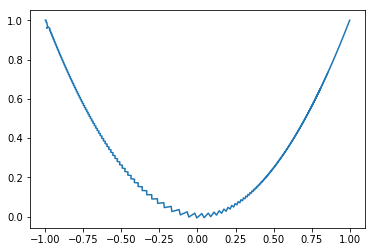

In [117]:
plt.plot(tab_x1,tab_x2)
plot.show()


Affichons maintenant l'évolution des x1 et x2 en fonction du nombre d'itérations : 

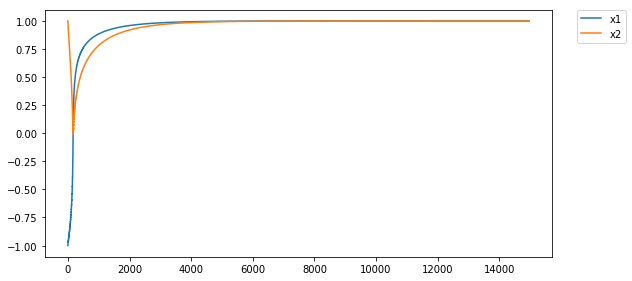

In [118]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(tab_x1, label="x1")
plt.plot(tab_x2, label="x2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plot.show()

On remarque que x1 et x2 convergent rapidement vers la solution. Le nombre d'itérations élevé est simplement dû à la précision choisie (0.000001). Si on exécute maintenant l'algorithme avec une précision de seulement 0.01, on obtient une solution beaucoup plus rapidement (0.1 seconde) et un nombre d'itérations plus petit. On peut alors tracer l'évolution de x1 et x2 en fonction du nombre d'itérations pour se rendre compte comment x1 et x2 convergent vers 1.

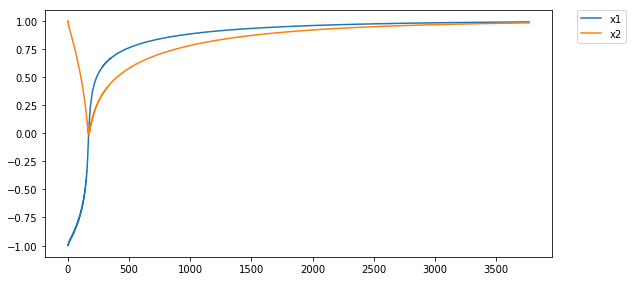

In [115]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(tab_x1, label="x1")
plt.plot(tab_x2, label="x2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plot.show()

### Section dorée

  
    
      
      

La méthode de la section dorée est une méthode de Dichotomie, elle permet entre autre de n'avoir à évaluer qu'une seule fois la fonction à minimiser à chaque itération. Nous allons utiliser cette méthode afin de trouver le minimum de la fonction $g(\theta)=f(x_k+\theta d)$ à chaque itération.  
Ci-dessous, le code de la méthode la section dorée :

In [124]:
def section_doree(x1, x2, d1, d2, a0, b0, epsilon) :
    alpha = (np.sqrt(5) - 1) / 2
    a = a0
    b = b0
    c = alpha*a + (1 - alpha)*b
    d = a + b - c
    while (b-a > 2*epsilon):
        if (f(x1 + c * d1, x2 + c * d2) < f(x1 + d * d1, x2 + d * d2)) :
            b = d
            d = c
            c = a + b - d
        else :
            a = c
            c = d
            d = a + b - c
    return (a + b) / 2

On va donc appeler cette fonction à chaque itération afin de trouver un theta optimal qui va faire converger l'algorithme plus rapidement. On garde toujours comme précision des solutions 0.000001. On initalise les paramètres de la fonction section dorée comme suit :  
* a0 = 0 et b0 = 1 car on cherche un $\theta$ compris entre 0 et 1.
* epsilon à 0.00001

In [152]:
start_time = time.time()
tab_x1_secdor =[]
tab_x2_secdor =[]
tab_theta_secdor = []
x1 = -1
x2 = 1
tab_x1_secdor.append(x1)
tab_x2_secdor.append(x2)
iteration_secdor = 0
d =  gradient_f(x1, x2)
theta = 0
a0 = 0
b0 = 1
epsilon = 0.00001
while not((-0.000001 < d[0] < 0.000001) and (-0.000001 < d[1] < 0.000001)) :
    d = np.dot(-1,gradient_f(x1, x2))
    theta = section_doree(x1, x2, d[0], d[1], a0, b0, epsilon)
    tab_theta_secdor.append(theta)
    x1 = x1 + theta * d[0]
    x2 = x2 + theta * d[1]
    tab_x1_secdor.append(x1)
    tab_x2_secdor.append(x2)
    iteration_secdor = iteration_secdor + 1
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

Temps d execution : 0.005766868591308594 secondes ---


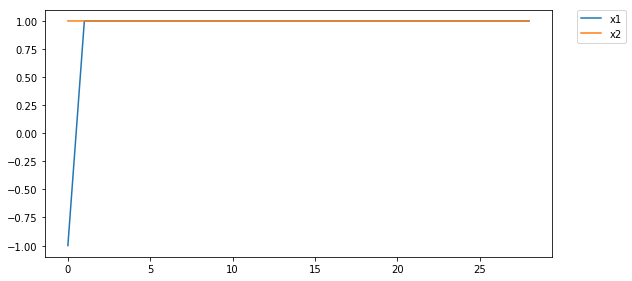

In [153]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(tab_x1_secdor, label="x1")
plt.plot(tab_x2_secdor, label="x2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plot.show()

La méthode de la section dorée semble très performante puisqu'elle fait converger l'algorithme en très peu d'itérations (moins de 5). 

Même avec un point de départ différent de (-1,1), l'algorithme converge très rapidement contrairement à la méthode de Newton utilisée précédemment. Prenons par exemple (-2,1) et regardons comment se comporte les points x1 et x2 au fur et à mesure des itérations : 

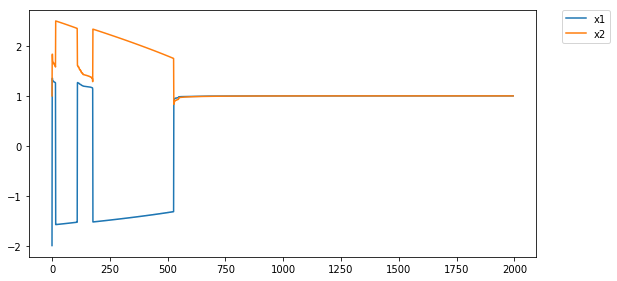

In [151]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(tab_x1_secdor, label="x1")
plt.plot(tab_x2_secdor, label="x2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plot.show()

En 500 itérations environ, l'algorithme donne la bonne solution avec une précision de 0.000001.

Nous avons donc au cours de ce TP pu tester différentes méthodes d'optimisation dans le but de minimiser la fonction de Rosenbrok. Nous avons pu voir qu'utiliser un pas fixe fait converger l'algorithme lentement, surtout si un mauvais pas est utilisé.  
Nous avons alors implémenté deux méthodes de minimisation unidirectionnelle afin de trouver le théta optimal à chaque itération. La méthode de la section dorée semble être plus performante que la méthode de Newton dans le cas de la fonction de Rosenbrok. Cela est peut être dû au calcul de $g''(\theta)$ à chaque itération.